# Question 2

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import copy

> ### linContrastStreching
>> The function *linConstrastStreching* linearly maps the original image range $(min(img)-max(img))$  to given range $(a-b)$ as $$ round(a + \frac{(img - min(img)) * (b - a)}{(max(img) - min(img))})$$

In [2]:
def linContrastStretching(img, a, b):
    return np.uint8(np.round(a+(img-np.min(img))*((b-a)/(np.max(img) - np.min(img)))))

In [3]:
def colorBar(img, k):
    colors, counts = np.unique(img.flatten().T, return_counts=True, axis=0)
    sort_ind = np.flip(np.argsort(counts))
    return colors[np.newaxis,sort_ind[0:k]]    

In [4]:
def plotImages(im1, cb1, im2, cb2):
    _, images = plt.subplots(2,2, figsize = (20,15))
    images[0][0].imshow(im1, cmap = 'gray', vmin = 0, vmax = 255)
    images[0][0].set_title('original')
    
    images[1][0].imshow(cb1, cmap = 'gray', vmin = 0, vmax = 255)
    images[1][0].set_title('colorbar - original')
    
    images[1][0].set_xticks(np.arange(-.5, cb1.shape[1], 1));
    images[1][0].set_yticks(np.arange(-.5, cb1.shape[0], 1));
    images[1][0].set_xticklabels(np.arange(0, cb1.shape[1]+1, 1))
    images[1][0].set_yticklabels(np.arange(1, cb1.shape[0]+1, 1))
    images[1][0].grid(color='w', linewidth=2)
    images[1][0].set_frame_on(False)
    
    images[0][1].imshow(im2, cmap = 'gray', vmin = 0, vmax = 255)
    images[0][1].set_title('contrast streched')
    
    images[1][1].imshow(cb2, cmap = 'gray', vmin = 0, vmax = 255)
    images[1][1].set_title('colorbar - contrast streched')
    
    images[1][1].set_xticks(np.arange(-.5, cb2.shape[1], 1));
    images[1][1].set_yticks(np.arange(-.5, cb2.shape[0], 1));
    images[1][1].set_xticklabels(np.arange(0, cb2.shape[1]+1, 1))
    images[1][1].set_yticklabels(np.arange(1, cb2.shape[0]+1, 1))
    images[1][1].grid(color='w', linewidth=1)
    images[1][1].set_frame_on(False)
    
    plt.show()

## Image 1
#### NOTE: color bar is most frequent color first



In [5]:
img = cv.imread('./images/cameraman.png')
out = linContrastStretching(copy.deepcopy(img), 10, 200)
cb1 = colorBar(img, 10)
cb2 = colorBar(out, 10)

print(np.min(img), np.max(img))

7 253


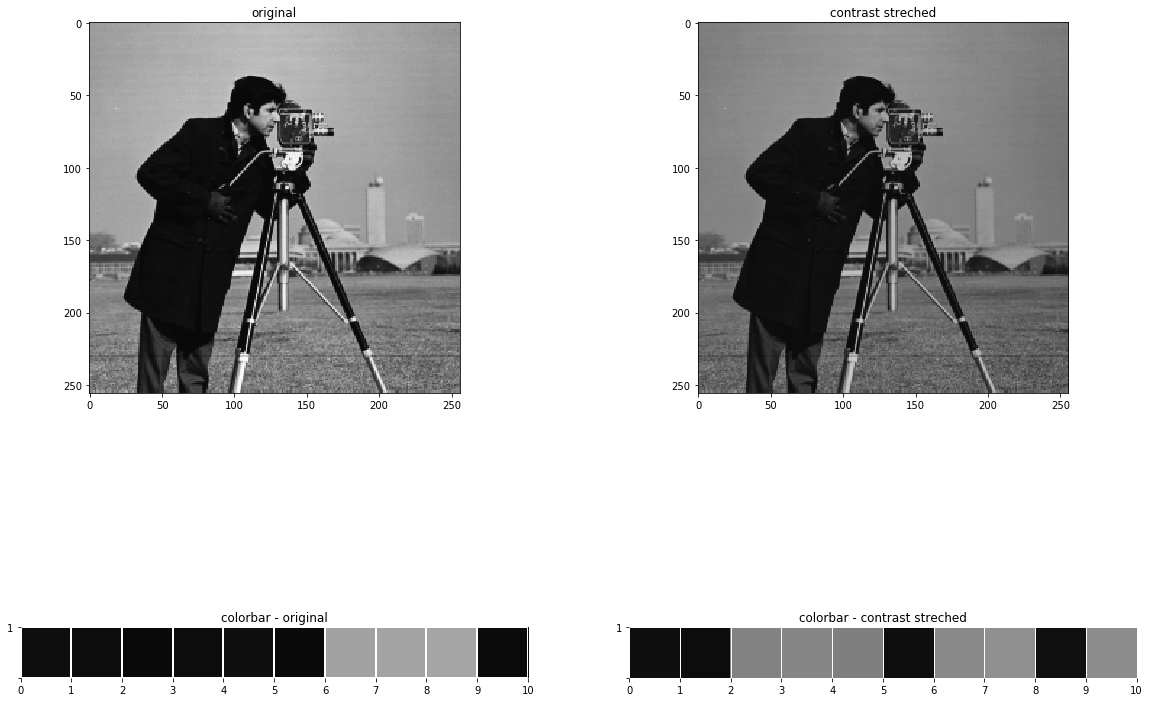

In [6]:
plotImages(img, cb1, out, cb2)

## Image 2
#### NOTE: color bar is most frequent color first

In [7]:
img = cv.imread('./images/iniac.jpg', cv.IMREAD_UNCHANGED)
out = linContrastStretching(copy.deepcopy(img), 50, 100)
cb1 = colorBar(img, 10)
cb2 = colorBar(out, 10)

print(np.min(img), np.max(img))

60 247


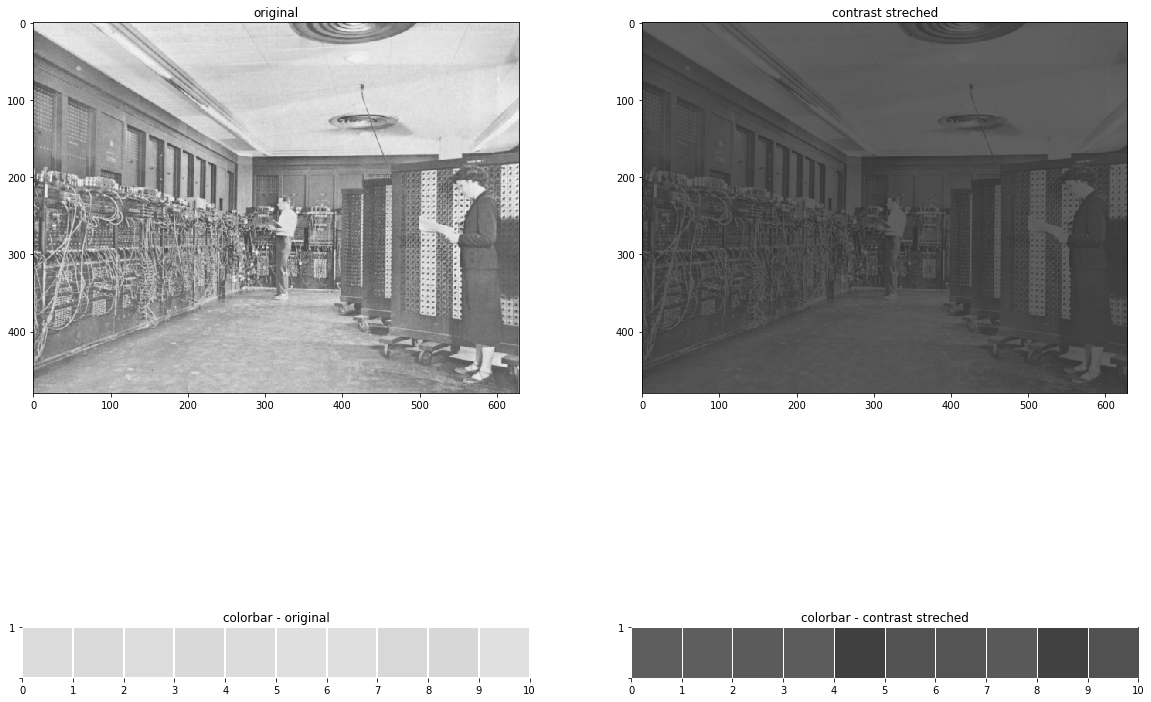

In [8]:
plotImages(img, cb1, out, cb2)

## Image 3
#### NOTE: color bar is most frequent color first

In [9]:
img = cv.imread('./images/hist_choice.jpg', cv.IMREAD_UNCHANGED)
out = linContrastStretching(copy.deepcopy(img), 10, 200)
cb1 = colorBar(img, 10)
cb2 = colorBar(out, 10)

print(np.min(img), np.max(img))

114 208


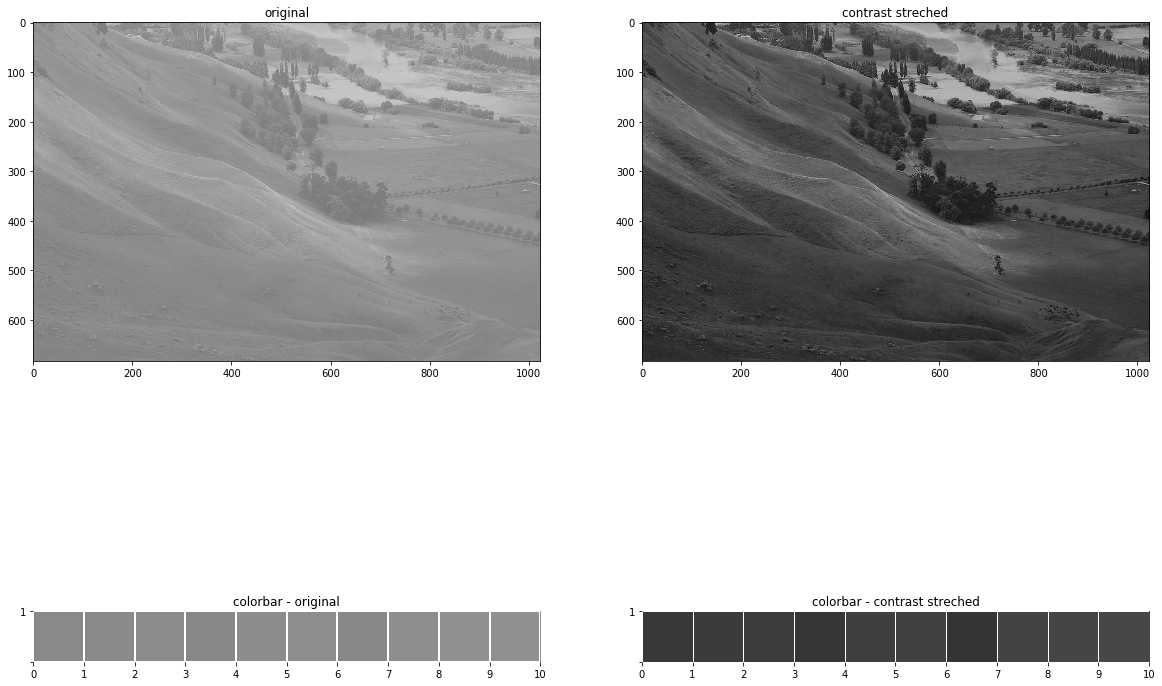

In [10]:
plotImages(img, cb1, out, cb2)

## Reasons
- The effect of contrast stretching is more profound in images with small intensity ranges (like image 3) as compared to images with large intenstity ranges (like image 1).
- So when both image 1 and image 3 are stretched to same contrast range (10-200), the effect is more clearly seen in image 3